In [4]:
import os
import re
import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

from config import DEVICE, CHECKPOINT_DIR, DISEASE_CLASSES, GROW_STAGES
from model.efficientnet import MultiTaskEfficientNet
from utils.find_best_checkpoint import find_best_checkpoint

In [5]:
def load_model(device):
    model = MultiTaskEfficientNet()
    ckpt = find_best_checkpoint(CHECKPOINT_DIR)
    state = torch.load(ckpt, map_location=device)
    model.load_state_dict(state)
    model.to(device).eval()
    print(f">> Loaded checkpoint: {os.path.basename(ckpt)}")
    return model

def predict(model, image_path, device):
    # 224×224, Normalize
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485,0.456,0.406],
                             std=[0.229,0.224,0.225]),
    ])

    # load and display original image
    img = Image.open(image_path).convert('RGB')
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Input Image")
    plt.show()

    # preprocess and inference
    x = transform(img).unsqueeze(0).to(device)
    with torch.no_grad():
        d_logits, g_logits = model(x)
        d_idx = int(d_logits.argmax(dim=1).item())
        g_idx = int(g_logits.argmax(dim=1).item())

    return d_idx, g_idx

Loaded pretrained weights for efficientnet-b0
>> Loading best checkpoint: best_epoch09_acc0.9932.pth (acc=0.9932)
>> Loaded checkpoint: best_epoch09_acc0.9932.pth


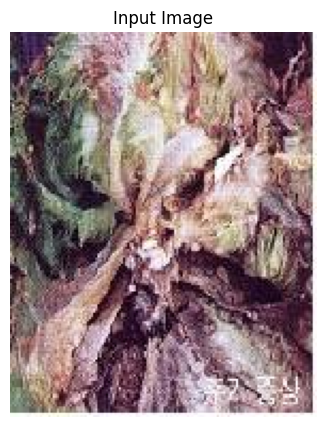

Image: assests/examples/상추균핵병1.jpg
Predicted disease   [9]: 상추균핵병
Predicted grow stage[1]: 생장기


In [ ]:
# 사용자가 원하는 이미지 경로
IMAGE_PATH = 'assests/examples/상추균핵병1.jpg'

model  = load_model(DEVICE)
d_idx, g_idx = predict(model, IMAGE_PATH, DEVICE)

print(f"Image: {IMAGE_PATH}")
print(f"Predicted disease   : [{d_idx}] {DISEASE_CLASSES[d_idx]}")
print(f"Predicted grow stage: [{g_idx}] {GROW_STAGES[g_idx]}")